## Modelling the attributes of Restaurants

In [187]:
import pandas as pd
import json
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading the data

In [169]:
raw_data = pd.read_csv('~/Documents/6242 Project/fall2018cse6242/data/arizona_business_details.csv', skipinitialspace=True)

All the available attibutes in the given dataset. 

In [160]:
attributes = set()
for each in raw_data['attributes']:
    line = {}
    try:
        each = eval(each)
    except TypeError:
        continue
    for k in each.keys():
        attributes.add(k)
        
attributes = list(attributes)
attributes

['Ambience',
 'BusinessAcceptsBitcoin',
 'BusinessAcceptsCreditCards',
 'Alcohol',
 'HappyHour',
 'Open24Hours',
 'DietaryRestrictions',
 'OutdoorSeating',
 'RestaurantsAttire',
 'Music',
 'NoiseLevel',
 'CoatCheck',
 'DogsAllowed',
 'AcceptsInsurance',
 'BusinessParking',
 'BYOBCorkage',
 'HairSpecializesIn',
 'ByAppointmentOnly',
 'RestaurantsDelivery',
 'HasTV',
 'RestaurantsPriceRange2',
 'BikeParking',
 'DriveThru',
 'BYOB',
 'Caters',
 'Corkage',
 'RestaurantsReservations',
 'RestaurantsGoodForGroups',
 'GoodForKids',
 'RestaurantsCounterService',
 'RestaurantsTableService',
 'RestaurantsTakeOut',
 'BestNights',
 'Smoking',
 'GoodForDancing',
 'GoodForMeal',
 'AgesAllowed',
 'WiFi',
 'WheelchairAccessible']

In [161]:
#Count of attributes 

len(attributes)

39

Total number of restaurants in the data set

In [162]:
n = raw_data.shape[0]
n

11072

Not all attributes are present in all restaurants, so lets find out the count of each attribute in all given restaurats

In [185]:
attribute_count = defaultdict(int)
for each in raw_data['attributes']:
#     each = eval(each)
    try:
        for attribute in attributes:
            if attribute in each:
                attribute_count[attribute] += 1
    except TypeError:
        continue
# attribute_count  

In [186]:
count_df = pd.DataFrame.from_dict(attribute_count, orient='index', columns= ['count'])
count_df['percent_of_total'] = count_df['count']/n
count_df = count_df.sort_values(by = 'percent_of_total', inplace=False, ascending=False)
count_df

,count,percent_of_total
BusinessAcceptsCreditCards,10648,0.961705
RestaurantsPriceRange2,10390,0.938403
RestaurantsTakeOut,10281,0.928559
RestaurantsGoodForGroups,10198,0.921062
GoodForKids,10168,0.918353
RestaurantsDelivery,10044,0.907153
RestaurantsReservations,10044,0.907153
OutdoorSeating,9908,0.894870
RestaurantsAttire,9902,0.894328
BusinessParking,9847,0.889361


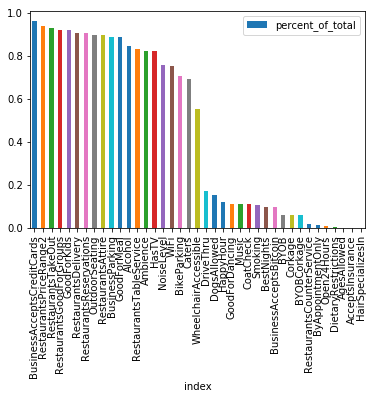

In [206]:
count_df.reset_index().plot.bar(x='index', y='percent_of_total')

Looking at the data/plot, makes sense to take attributes with > 50% occurrence

In [215]:
attributes = count_df[count_df['percent_of_total']>0.5].index.values.tolist()

In [224]:
attributes.remove('RestaurantsPriceRange2')
attributes

['BusinessAcceptsCreditCards',
 'RestaurantsTakeOut',
 'RestaurantsGoodForGroups',
 'GoodForKids',
 'RestaurantsDelivery',
 'RestaurantsReservations',
 'OutdoorSeating',
 'RestaurantsAttire',
 'BusinessParking',
 'GoodForMeal',
 'Alcohol',
 'RestaurantsTableService',
 'Ambience',
 'HasTV',
 'NoiseLevel',
 'WiFi',
 'BikeParking',
 'Caters',
 'WheelchairAccessible']

- BusinessAcceptsCreditCards
    - True - 1
    - False - 0
- RestaurantsTakeOut
- RestaurantsGoodForGroups
     'GoodForKids',
     'RestaurantsDelivery',
     'RestaurantsReservations',
     'OutdoorSeating',
     'RestaurantsAttire',
     'BusinessParking',
     'GoodForMeal',
     'Alcohol',
     'RestaurantsTableService',
     'Ambience',
     'HasTV',
     'NoiseLevel',
     'WiFi',
     'BikeParking',
     'Caters',
     'WheelchairAccessible'

In [225]:
check = ['False', 'False', 'False', 'False', 'False', 'False', 'False', 'RestaurantsAttire', 'BusinessParking', 
         'GoodForMeal', 'none', 'False', 'Ambience', 'False', 'NoiseLevel', 'no', 'False', 'False', 
         'WheelchairAccessible']

19

In [283]:
def attribute_check(attribute, restaurant, check):
    if attribute in restaurant:
        if restaurant[attribute] == check:
            return 0
        else:
            return 1
    else:
        return 0

In [324]:
dframe = pd.DataFrame(columns=attributes)

for index, row in raw_data.iterrows():
#     print(index)
    try:
        each = eval(row['attributes'])
        line = {}
        line['rating'] = row['stars']
        for i in range(len(attributes)):
            line[attributes[i]] = attribute_check(attributes[i], each, check[i])
        temp_df = pd.DataFrame([line])
        dframe = dframe.append(temp_df, ignore_index=True, sort=False)

    except TypeError:
        continue

In [325]:
dframe.tail()

,BusinessAcceptsCreditCards,RestaurantsTakeOut,RestaurantsGoodForGroups,GoodForKids,RestaurantsDelivery,RestaurantsReservations,OutdoorSeating,RestaurantsAttire,BusinessParking,GoodForMeal,Alcohol,RestaurantsTableService,Ambience,HasTV,NoiseLevel,WiFi,BikeParking,Caters,WheelchairAccessible,rating
10934,1,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,0,1,1,3.0
10935,1,0,1,1,0,1,0,1,1,1,1,1,1,0,1,0,0,1,1,4.0
10936,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,1,1,4.5
10937,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,3.0
10938,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0


## Model Building

In [341]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split



In [342]:
train, test = train_test_split(dframe, test_size=0.2)


In [347]:
X_train = train.loc[:, dframe.columns != 'rating']
y_train = train['rating']

X_test = test.loc[:, dframe.columns != 'rating']
y_test = test['rating']

In [348]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

Coefficients: 
 [-0.16110127 -0.11479896  0.03831608  0.01961375  0.01967237  0.08722792
  0.12477999 -0.45377189  0.21464319  0.04257535  0.01321527  0.05737472
  0.01790806  0.03405232 -0.07677148  0.01423198  0.13070073  0.21677773
  0.25966804]
Mean squared error: 0.57
Variance score: 0.13


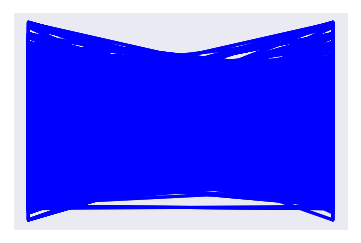

In [362]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [360]:
for i in range(len(attributes)):
    if regr.coef_[i] > 0.1:
        print(attributes[i])

OutdoorSeating
BusinessParking
BikeParking
Caters
WheelchairAccessible
